In [11]:
push!(LOAD_PATH, pwd()*"/..")
import_path = "/Users/julian/Harvard/research/nowak/indirect_rec/src"
push!(LOAD_PATH, import_path)
using LightGraphs, Epidemics, GraphGeneration,IM
using NLsolve
# using PyPlot, Distributions
using DegreeDistribution
using StatsBase
using GraphCreation
 using GraphClustering
 using DataAnalysis
using TwoLevelGraphs
using GraphPlotting,GraphPlot,Plots

In [64]:
N = 60
k = 10
C = 0.5
# d = Binomial(k,1) 
sigma_k = 8
min_degree = 3
R = random_regular_graph(N,k)
# K = create_graph(N,k,:watts_strogatz,C,deg_distr=d)
# G = graph_from_gamma_distribution(N,k,sigma_k,min_degree)
# GC = regular_clustering_graph(N,k,C)
# R = LightGraphs.random_regular_graph(N,k)
m = 10 #0.5: m=14,l=9,r=1 $ 0.3: m = 10, l = 7, r = 3
l = 9
r = k -l
t = TwoLevel(Int(ceil(N/m)*m),m,l,r)
# l = 9
# m = 20
# t = TwoLevel(N,m,l,k-r)
T = generate_regular_two_level_graph(t)

alpha,beta = 1.0,0.1

# K = create_graph(N,k,:watts_strogatz,C)#,deg_distr=d)
println(mean(local_clustering_coefficient(T)))
my_layout(x) = spring_layout(x,C=1,MAXITER=1000)
x,y = my_layout(T)
my_layout_this(_) = x,y
g = T

0.8


{60, 300} undirected simple Int64 graph

In [73]:
num_trials_local_sim = 1
# graph_fn = () -> create_graph(N,k,:erdos_renyi,C,deg_distr=d)
graph_fn = () -> g #create_graph(N,k,:watts_strogatz,C,deg_distr=d)
graph_data = C

println(alpha," ", beta)
im_normal = InfectionModel(x -> 1 + alpha*x , x -> 1 + beta);
fixation_threshold = (N-1)/N
carry_by_node_information = true
graph_model = true
in_parallel = true
graph_information = GraphInformation(graph_fn,Graph(),carry_by_node_information,graph_data)

@time runssim = run_epidemics_parallel(num_trials_local_sim,() -> run_epidemic_graph_gillespie(N,im_normal,graph_information,fixation_threshold),in_parallel)

1.0 0.1
  0.118574 seconds (61.86 k allocations: 2.536 MiB)


1-element Array{Epidemics.EpidemicRun,1}:
 Epidemics.EpidemicRun([1.0, 2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 2.0, 3.0, 4.0  …  54.0, 55.0, 56.0, 57.0, 58.0, 57.0, 58.0, 57.0, 58.0, 59.0], Inf, true, Array{Int64,1}[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  1, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 1, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 1, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 1, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 1, 0, 1, 0, 1, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 1, 0, 1, 1, 1, 0]  …  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  1, 1, 1, 0, 1, 0, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  1, 1, 1, 0, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1

In [74]:
i_vs_t= runssim[1].infecteds_by_nodes_vs_time
runssim[1].infecteds_by_nodes_vs_time

201-element Array{Array{Int64,1},1}:
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  1, 0, 0, 0, 1, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 1, 0, 0, 1, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 1, 0, 0, 1, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 1, 0, 0, 0, 1, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 1, 0, 1, 0, 1, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 1, 0, 1, 1, 1, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 1, 1, 1, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 1, 1, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 1, 0, 0, 1, 1, 0, 0]
 ⋮                                                              
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  1, 1, 1, 1, 1, 0, 

  0.282173 seconds (625.27 k allocations: 30.709 MiB, 3.06% gc time)



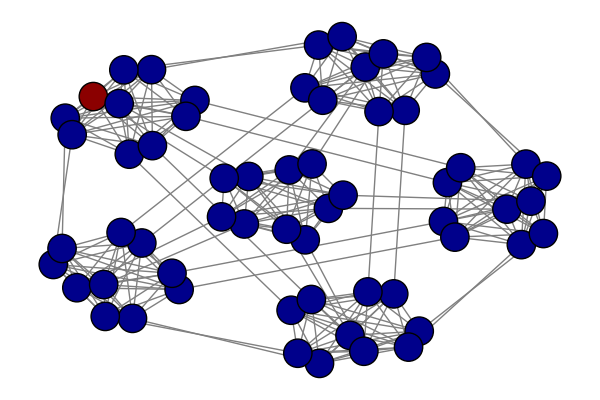

In [77]:
pyplot()
lw = 1.0
edge_alpha = 0.5
fac = 2.0
@time plot_graph_plots(g,N,node_color=i_vs_t[1],fac=fac,edge_alpha = edge_alpha,lw = lw,layout_fn=my_layout_this)

# Plots.colormap("RdBu")

# legend()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201


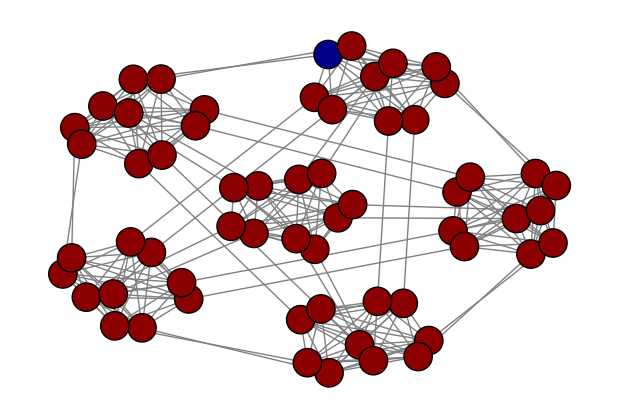

INFO: Saved animation to /Users/julian/Dropbox/ubuntu_home/Harvard/research/desai/population/src/notebooks/tmp.gif


Plots.AnimatedGif("/Users/julian/Dropbox/ubuntu_home/Harvard/research/desai/population/src/notebooks/tmp.gif")

In [78]:
lw = 1.0
edge_alpha = 0.5
fac = 2.0
# my_layout(x) = spring_layout(x,C=1,MAXITER=1000)
# x,y = my_layout(K)
# my_layout_this(_) = x,y
# figure(dpi=200)
# using Plots,PyPlot
# using LightGraphs
# using PlotRecipes
# anim = @animate for i = 1:4
pyplot()
i_vs_t= runssim[1].infecteds_by_nodes_vs_time
anim = @animate for i = 1:length(i_vs_t)
    println(i)
# for i = 1:length(i_vs_t)
#     plot(rand(5))#,color="green")
#     graphplot(K)
    plot_graph_plots(g,N,node_color=i_vs_t[i],fac=fac,edge_alpha = edge_alpha,lw = lw,layout_fn=my_layout_this)
    #     pause(0.5)
#     PyPlot.draw()
#     Plots.plot(0:length(vec)-1,vec,ylim=[0,20],label="")
#     Plots.xlabel!(L"$j$")
#     Plots.ylabel!(L"$a_j$")
end every 5
gif(anim,fps=5)
# gif(anim, "tmp.gif",fps=20)

In [76]:
function plot_graph_plots(g,N;node_color="grey",edge_color="grey"
    ,lw=2,fac=10.0,edge_alpha=1.0,alpha=1.0,layout_fn=nothing,
    zoom = 1.2)
#     locx,locy = random_layout(g)
    #     p_knowns = get_p_known_percolation(g,p,N,num_trials)[1]
    if layout_fn == nothing
        layout_fn = spring_layout
    end


    locx,locy = layout_fn(g)
    ks = degree(g)
    cs = local_clustering_coefficient(g)
    ns = (ks-1).*cs
    
    lims = (-1.0*zoom,1.0*zoom)

    edge_pos = [[[locx[e.src],locx[e.dst]],[locy[e.src],locy[e.dst]]] for e in edges(g)]
    # Plots.hold(1)
    for (i,pos) in enumerate(edge_pos)
        if i == 1
            Plots.plot(pos[1],pos[2],color=edge_color,legend=false,axis=false,xlims=lims,ylims=lims,linewidth=lw)
        else
            Plots.plot!(pos[1],pos[2],color=edge_color,legend=false,axis=false,xlims=lims,ylims=lims,linewidth=lw)
        end
    end
    Plots.scatter!(locx,locy,ms=fac*(0.2+ks),m = (:bluesreds,alpha,stroke(1,"black")),zcolor=node_color)
#     zcolor=abs(y - 0.5),m=(:heat,0.8,stroke(1,:green)),ms=10 * abs(y - 0.5) + 4,
    #:inferno, :heat, :blues
    
#     Plots.set_xlim([-1.0*zoom,1.0*zoom])
#     Plots.set_ylim([-1.0*zoom,1.0*zoom])
#     Plots.axis("off")
end

plot_graph_plots (generic function with 1 method)

1-element Array{Int64,1}:
 10